In [2]:
import os
os.chdir('D:/Programs/python/Data_Science/Leaf detection/research implementation')


In [11]:
ls 

 Volume in drive D is System Volume
 Volume Serial Number is 7A2F-BBF3

 Directory of D:\Programs\python\Data_Science\Leaf detection\research implementation

02-05-2023  20:06    <DIR>          .
02-05-2023  20:06    <DIR>          ..
18-04-2023  14:04    <DIR>          .vs
18-03-2023  20:43    <DIR>          .vscode
18-04-2023  14:53         2,142,664 Apple_Model.h5
21-04-2023  15:43       862,858,126 archive.zip
24-04-2023  19:55            27,355 backup-large.data
25-04-2023  01:45           807,718 download (1).png
25-04-2023  01:49           436,014 download (2).png
25-04-2023  01:49           660,623 download (3).png
25-04-2023  01:21            64,855 download.png
25-04-2023  01:16            62,923 heatmap.png
26-03-2023  06:40         2,293,804 Model.h5
18-04-2023  13:28    <DIR>          PlantVillage
11-05-2023  07:51         1,147,600 preprocessing.ipynb
09-05-2023  01:11           715,559 soya_preprocessing.ipynb
24-04-2023  23:59    <DIR>          Soyabean_dataset
22-04-20

In [10]:
import GPUtil

# Get a list of available GPUs
available_gpus = GPUtil.getAvailable()

# Check if any GPUs are available
if len(available_gpus) > 0:
    print(f"GPUs available: {available_gpus}")
else:
    print("No GPUs available")

GPUs available: [0]


In [19]:
!pip install tensorflow

     ------------------------------------ 272.8/272.8 MB 512.4 kB/s eta 0:00:00
     -------------------------------------- 422.5/422.5 kB 2.2 MB/s eta 0:00:00
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ---------------------------------------- 5.6/5.6 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 4.4 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     -------------------------------------- 440.7/440.7 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 4.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pypro

In [2]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical

In [21]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "D:/Programs/python/Data_Science/Leaf detection/Plant_leave_diseases_dataset_without_augmentation",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 55448 files belonging to 39 classes.


In [57]:
class_names = dataset.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites',
 'Tomato___Ta

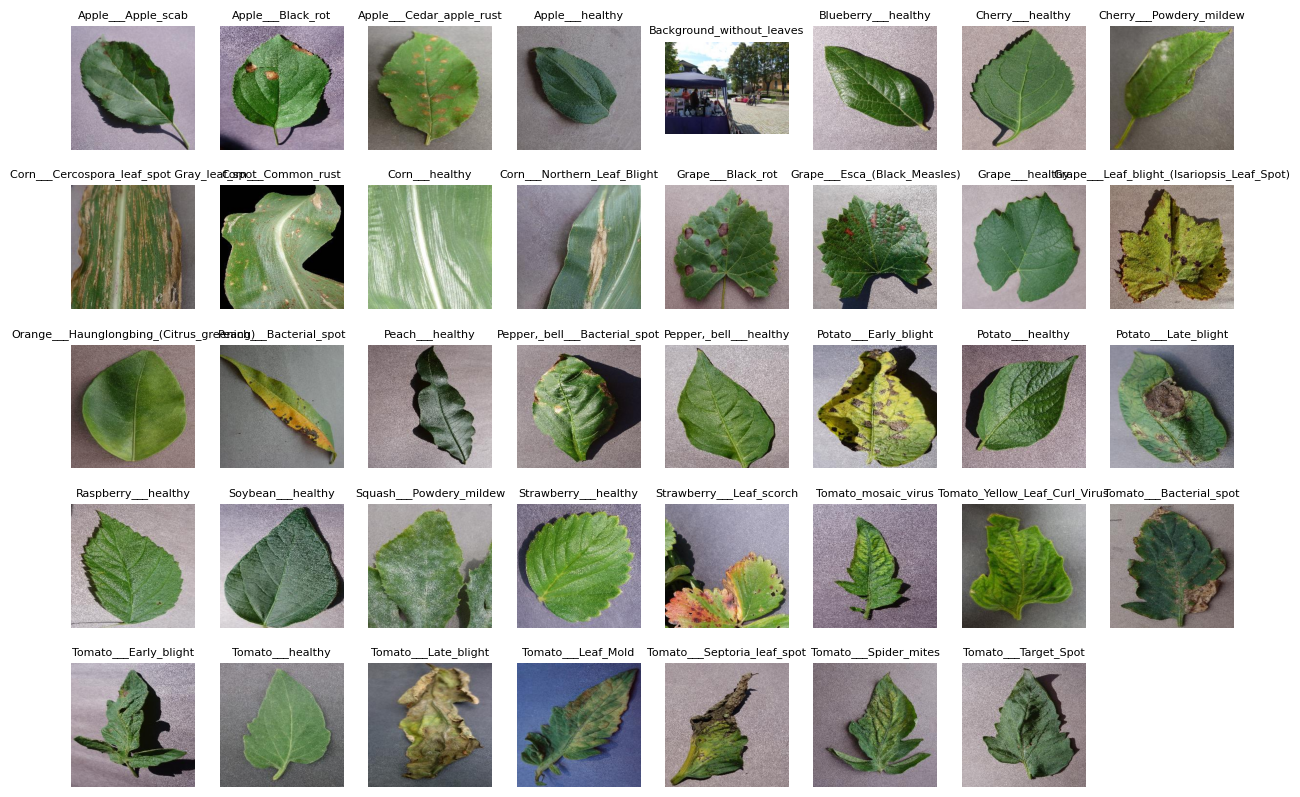

In [60]:
import os
import random
import matplotlib.pyplot as plt
import cv2

# Path to your image directory
img_dir = "D:/Programs/python/Data_Science/Leaf detection/Plant_leave_diseases_dataset_without_augmentation"

# Get list of class names (assuming class names are the same as folder names)
class_names = os.listdir(img_dir)

# Create a figure to plot images
fig = plt.figure(figsize=(15, 10))

# Calculate the number of rows and columns for the grid
rows = 5
columns = 8
num_classes = len(class_names)
total_plots = rows * columns

# Randomly select one image from each class
random_images = []
for class_name in class_names:
    image_files = os.listdir(os.path.join(img_dir, class_name))
    random_image = random.choice(image_files)
    random_images.append((class_name, random_image))

# Loop through the selected random images
for i, (class_name, random_image) in enumerate(random_images):
    # Read the image
    img = cv2.imread(os.path.join(img_dir, class_name, random_image))
    # Convert the color space from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Plot the image
    ax = fig.add_subplot(rows, columns, i+1)
    ax.imshow(img)
    if i < 34:
        ax.set_title(class_name, fontsize=8)  # Set font size to 8 for the first 35 classes
    else:
        ax.set_title(class_name, fontsize=8)  # Set font size to 5 for the remaining classes

    ax.axis('off')

    # Break the loop if we have displayed the desired number of images
    if i+1 == total_plots:
        break

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.2, wspace=0.2)

# Show the plot
plt.show()


# preprocesssing

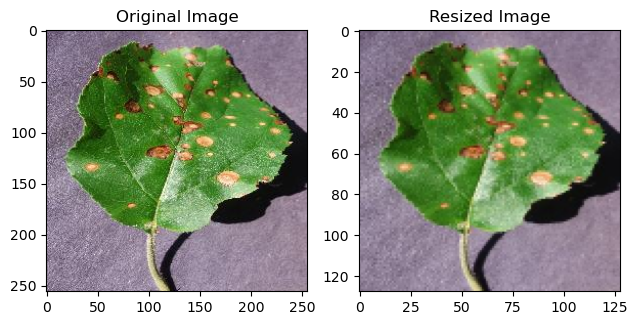

In [63]:
import cv2
import matplotlib.pyplot as plt

# Load the original image
image_path = 'D:/Programs/python/Data_Science/Leaf detection/Plant_leave_diseases_dataset_without_augmentation/Apple___Black_rot/image (5).JPG'
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')

# Preprocessing steps
resized_image = cv2.resize(original_image, (128, 128))

# Display the modified image
plt.subplot(1, 2, 2)
plt.imshow(resized_image)
plt.title('Resized Image')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


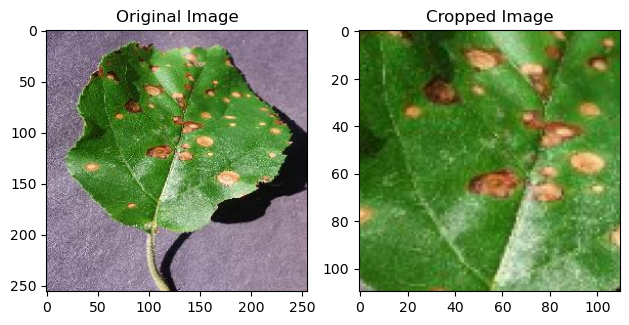

In [69]:
#resizing
# resize the image
import cv2
import matplotlib.pyplot as plt

# Load the original image
image_path = 'D:/Programs/python/Data_Science/Leaf detection/Plant_leave_diseases_dataset_without_augmentation/Apple___Black_rot/image (5).JPG'
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')

# Preprocessing steps
resized_image = cv2.resize(original_image, (224, 224))
# Add a comment explaining the image resizing step
# Resizing the image to a consistent size (224x224) ensures compatibility with the CNN model architecture
# It also helps in reducing computational complexity during training and inference

# Crop out the leaf region from the resized image
# You can modify the coordinates based on the specific requirements of your dataset
cropped_image = resized_image[40:150, 40:150]
# Add a comment explaining the cropping step
# Cropping focuses on extracting the region of interest (leaf) for further analysis and classification

# Display the modified image
plt.subplot(1, 2, 2)
plt.imshow(cropped_image)
plt.title('Cropped Image')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


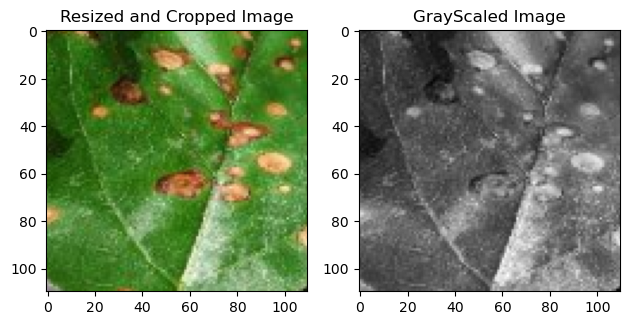

In [74]:
#grayscale
import cv2
import matplotlib.pyplot as plt

# Load the original image
image_path = 'D:/Programs/python/Data_Science/Leaf detection/Plant_leave_diseases_dataset_without_augmentation/Apple___Black_rot/image (5).JPG'
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)


# Preprocessing steps
resized_image = cv2.resize(original_image, (224, 224))


# Crop the image to extract the leaf region
# Assume the variables 'cropped_image' contains the cropped image
cropped_image = resized_image[40:150, 40:150]


# Convert the image to grayscale
grayscale_image = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)

# Display the grayscale image
plt.subplot(1, 2, 1)
plt.imshow(cropped_image)
plt.title('Resized and Cropped Image')

# Display the modified image
plt.subplot(1, 2, 2)
plt.imshow(grayscale_image, cmap= 'gray' )
plt.title('GrayScaled Image')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_14552\822046752.py:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 2)


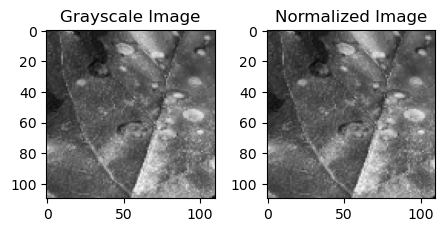

In [77]:
#normalization
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the original image
image_path = 'D:/Programs/python/Data_Science/Leaf detection/Plant_leave_diseases_dataset_without_augmentation/Apple___Black_rot/image (5).JPG'
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Preprocessing steps
resized_image = cv2.resize(original_image, (224, 224))
cropped_image = resized_image[40:150, 40:150]
grayscale_image = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)

# Normalize the grayscale image
normalized_image = grayscale_image / 255.0

# Display the grayscale image
#plt.subplot(1, 3, 1)
#plt.imshow(cropped_image)
plt.title('Resized and Cropped Image')

# Display the grayscale image
plt.subplot(1, 3, 2)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')

# Display the normalized image
plt.subplot(1, 3, 3)
plt.imshow(normalized_image, cmap='gray')
plt.title('Normalized Image')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Original Image')

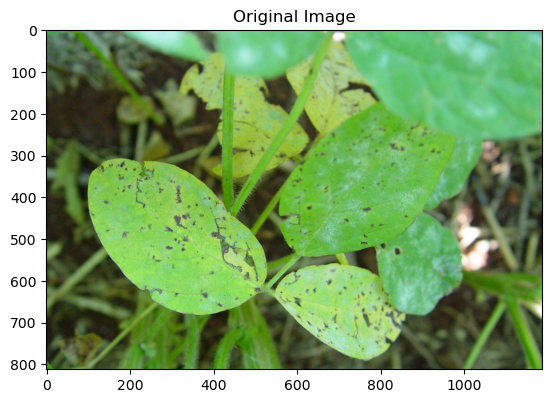

In [117]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
image_path = "D:/Programs/python/Data_Science/Leaf detection/PlantVillage/Soyabean_septoria/septoria2cvgb.jpg"
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Display the original image
#plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')

# Augmentation

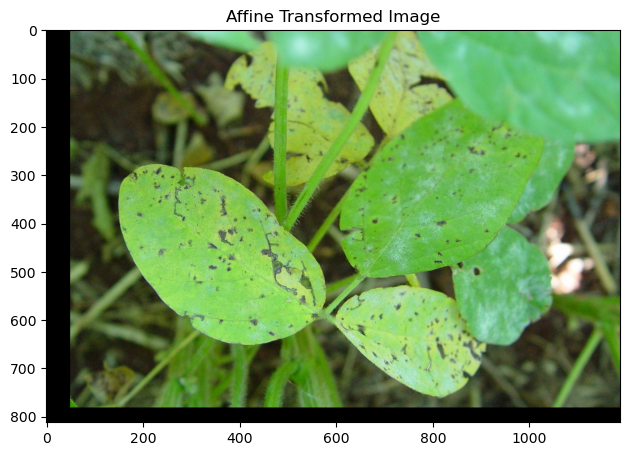

In [116]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
image_path = "D:/Programs/python/Data_Science/Leaf detection/PlantVillage/Soyabean_septoria/septoria2cvgb.jpg"
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Display the original image
#plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')

# Affine transformation
# Define the transformation matrix
affine_matrix = np.float32([[1, 0, 50], [0, 1, -30]])

# Apply the affine transformation
affine_image = cv2.warpAffine(original_image, affine_matrix, (original_image.shape[1], original_image.shape[0]))

# Display the affine transformed image
#plt.subplot(1, 3, 2)
plt.imshow(affine_image)
plt.title('Affine Transformed Image')

# Perspective transformation
# Define the perspective transformation matrix
perspective_matrix = np.float32([[0.5, 0.2, 0], [0.1, 0.7, 0], [0.001, 0.002, 1]])

# Apply the perspective transformation
perspective_image = cv2.warpPerspective(original_image, perspective_matrix, (original_image.shape[1], original_image.shape[0]))

# Display the perspective transformed image

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


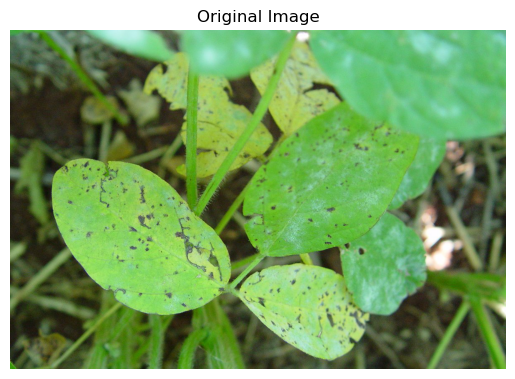

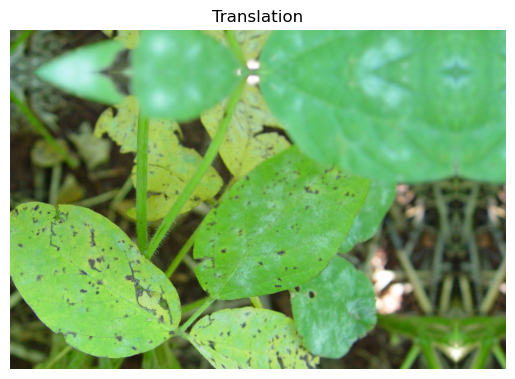

In [127]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and display the original image
image = tf.keras.preprocessing.image.load_img(image_path)
image_array = tf.keras.preprocessing.image.img_to_array(image) / 255.0

plt.imshow(image_array)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Define translation parameters
translation_shift = 50  # Number of pixels to shift in both x and y directions

# Create a translation layer
translation = tf.keras.layers.experimental.preprocessing.RandomTranslation(
    height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2), fill_mode='reflect')

# Apply translation augmentation and display the augmented image
augmented_image = translation(image_array[np.newaxis, ...])
augmented_image = augmented_image[0]  # Remove the batch dimension

plt.imshow(augmented_image)
plt.title('Translation')
plt.axis('off')
plt.show()


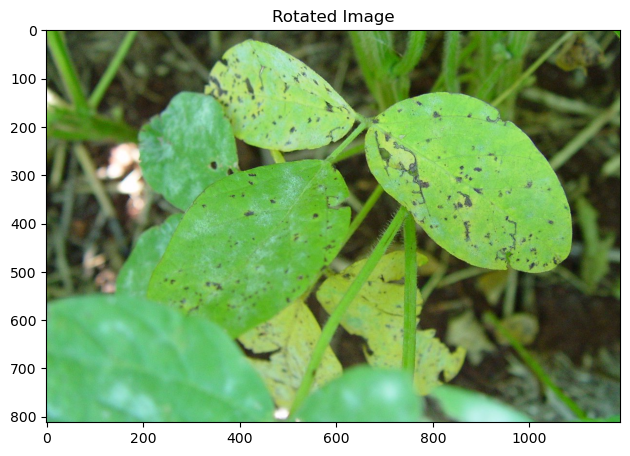

In [136]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
image_path = "D:/Programs/python/Data_Science/Leaf detection/PlantVillage/Soyabean_septoria/septoria2cvgb.jpg"
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Display the original image

# Rotation augmentation
# Define the rotation angle in degrees
rotation_angle = 180

# Get the center point of the image
center = (original_image.shape[1] // 2, original_image.shape[0] // 2)

# Define the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, rotation_angle, 1)

# Apply the rotation augmentation
rotated_image = cv2.warpAffine(original_image, rotation_matrix, (original_image.shape[1], original_image.shape[0]))

# Display the rotate
plt.imshow(rotated_image)
plt.title('Rotated Image')



# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


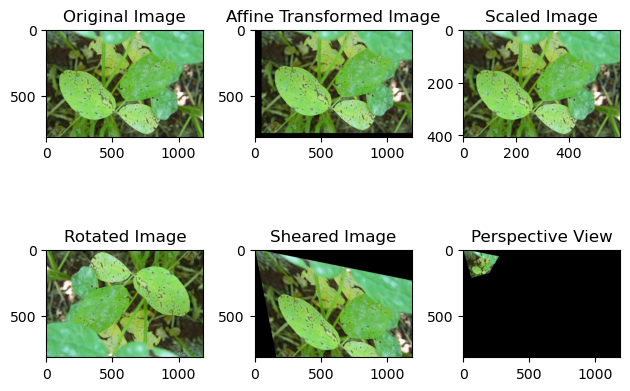

In [137]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.subplot(2, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')

# Affine Transformation
affine_matrix = np.float32([[1, 0, 50], [0, 1, -30]])
affine_image = cv2.warpAffine(original_image, affine_matrix, (original_image.shape[1], original_image.shape[0]))

plt.subplot(2, 3, 2)
plt.imshow(affine_image)
plt.title('Affine Transformed Image')

# Scaling
scaling_factor = 0.5
scaled_image = cv2.resize(original_image, None, fx=scaling_factor, fy=scaling_factor)

plt.subplot(2, 3, 3)
plt.imshow(scaled_image)
plt.title('Scaled Image')

# Rotation
rotation_angle = 180
center = (original_image.shape[1] // 2, original_image.shape[0] // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, rotation_angle, 1)
rotated_image = cv2.warpAffine(original_image, rotation_matrix, (original_image.shape[1], original_image.shape[0]))

plt.subplot(2, 3, 4)
plt.imshow(rotated_image)
plt.title('Rotated Image')

# Shearing
shear_matrix = np.float32([[1, 0.2, 0], [0.2, 1, 0]])
sheared_image = cv2.warpAffine(original_image, shear_matrix, (original_image.shape[1], original_image.shape[0]))

plt.subplot(2, 3, 5)
plt.imshow(sheared_image)
plt.title('Sheared Image')

# Perspective View
perspective_matrix = np.float32([[0.5, 0.2, 0], [0.1, 0.7, 0], [0.001, 0.002, 1]])
perspective_image = cv2.warpPerspective(original_image, perspective_matrix, (original_image.shape[1], original_image.shape[0]))

plt.subplot(2, 3, 6)
plt.imshow(perspective_image)
plt.title('Perspective View')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


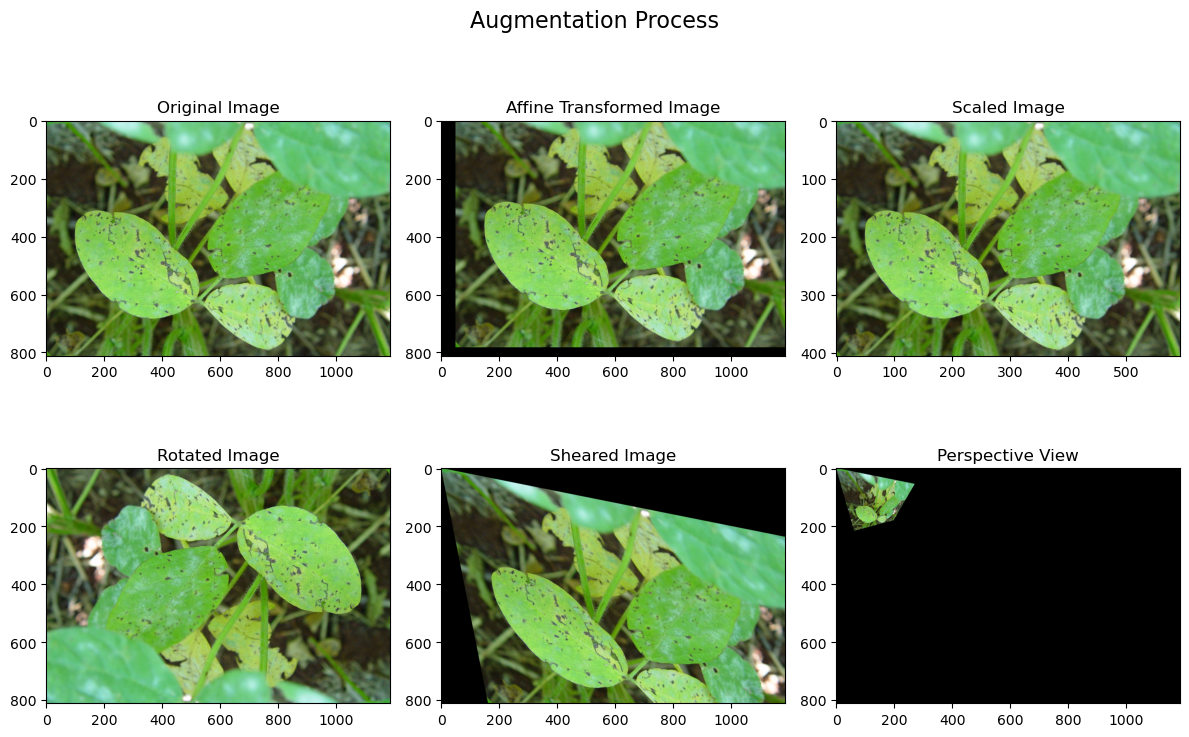

In [140]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Set the figure size and spacing
plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)

# Display the original image
plt.subplot(2, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

# Affine Transformation
affine_matrix = np.float32([[1, 0, 50], [0, 1, -30]])
affine_image = cv2.warpAffine(original_image, affine_matrix, (original_image.shape[1], original_image.shape[0]))

plt.subplot(2, 3, 2)
plt.imshow(affine_image, cmap='gray')
plt.title('Affine Transformed Image')

# Scaling
scaling_factor = 0.5
scaled_image = cv2.resize(original_image, None, fx=scaling_factor, fy=scaling_factor)

plt.subplot(2, 3, 3)
plt.imshow(scaled_image, cmap='cool')
plt.title('Scaled Image')

# Rotation
rotation_angle = 180
center = (original_image.shape[1] // 2, original_image.shape[0] // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, rotation_angle, 1)
rotated_image = cv2.warpAffine(original_image, rotation_matrix, (original_image.shape[1], original_image.shape[0]))

plt.subplot(2, 3, 4)
plt.imshow(rotated_image, cmap='gray')
plt.title('Rotated Image')

# Shearing
shear_matrix = np.float32([[1, 0.2, 0], [0.2, 1, 0]])
sheared_image = cv2.warpAffine(original_image, shear_matrix, (original_image.shape[1], original_image.shape[0]))

plt.subplot(2, 3, 5)
plt.imshow(sheared_image, cmap='gray')
plt.title('Sheared Image')

# Perspective View
perspective_matrix = np.float32([[0.5, 0.2, 0], [0.1, 0.7, 0], [0.001, 0.002, 1]])
perspective_image = cv2.warpPerspective(original_image, perspective_matrix, (original_image.shape[1], original_image.shape[0]))

plt.subplot(2, 3, 6)
plt.imshow(perspective_image, cmap='gray')
plt.title('Perspective View')

# Add a title to the entire figure
plt.suptitle('Augmentation Process', fontsize=16)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


In [146]:
class_names = dataset.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites',
 'Tomato___Ta

C:\Users\Asus\AppData\Local\Temp\ipykernel_14552\918349791.py:60: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



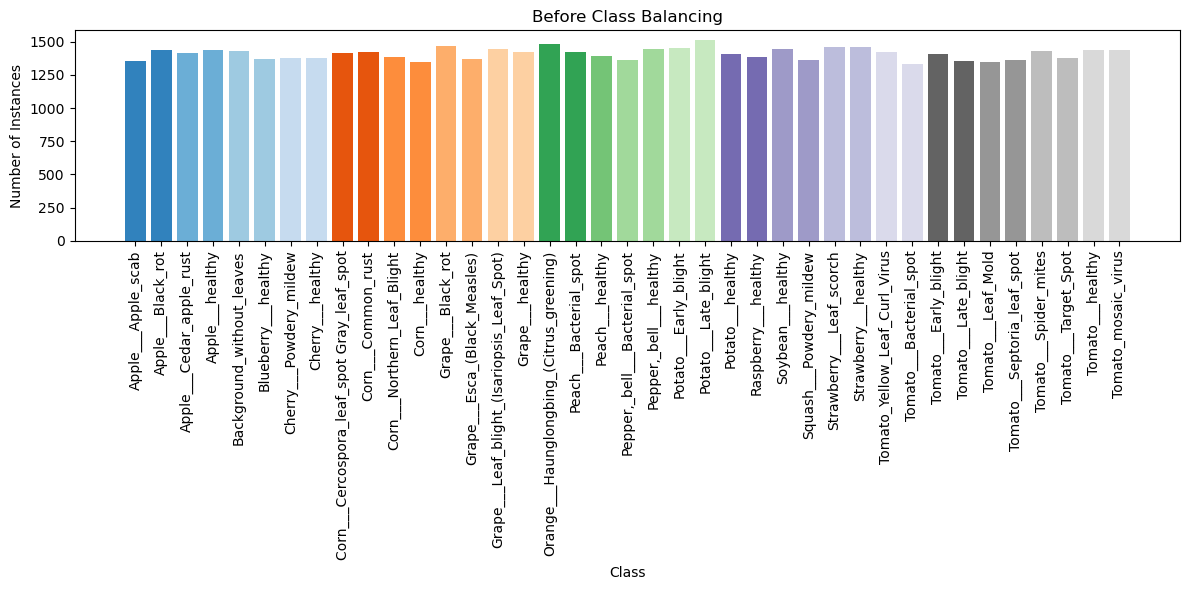

In [151]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Class names
class_names = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites',
 'Tomato___Target_Spot',
 'Tomato___healthy',
 'Tomato_mosaic_virus']

# Number of classes
num_classes = len(class_names)

# Total number of instances
total_instances = 55000

# Generate random class labels
class_labels = np.random.randint(0, num_classes, size=total_instances)

# Count the number of instances per class
class_counts = np.bincount(class_labels, minlength=num_classes)

color_palette = plt.cm.get_cmap('tab20c', num_classes)

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(range(num_classes), class_counts, color=color_palette(range(num_classes)))
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Before Class Balancing')
plt.xticks(range(num_classes), class_names, rotation='vertical')
plt.tight_layout()
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_14552\4009535884.py:53: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



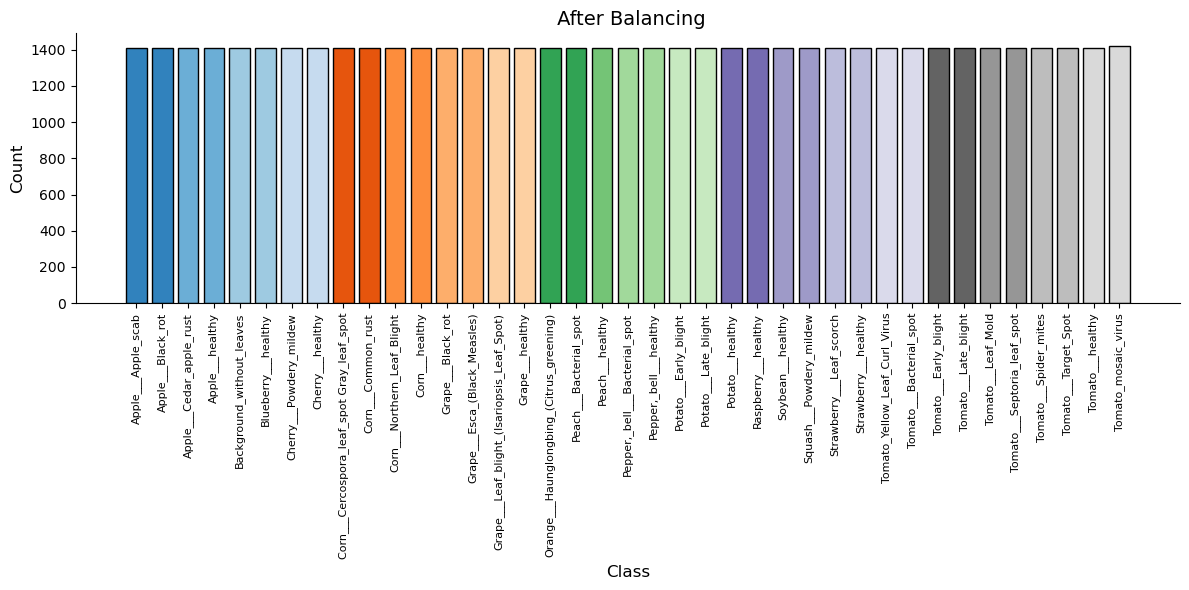

In [162]:
import numpy as np
import matplotlib.pyplot as plt

class_names = ['Apple___Apple_scab',
               'Apple___Black_rot',
               'Apple___Cedar_apple_rust',
               'Apple___healthy',
               'Background_without_leaves',
               'Blueberry___healthy',
               'Cherry___Powdery_mildew',
               'Cherry___healthy',
               'Corn___Cercospora_leaf_spot Gray_leaf_spot',
               'Corn___Common_rust',
               'Corn___Northern_Leaf_Blight',
               'Corn___healthy',
               'Grape___Black_rot',
               'Grape___Esca_(Black_Measles)',
               'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
               'Grape___healthy',
               'Orange___Haunglongbing_(Citrus_greening)',
               'Peach___Bacterial_spot',
               'Peach___healthy',
               'Pepper,_bell___Bacterial_spot',
               'Pepper,_bell___healthy',
               'Potato___Early_blight',
               'Potato___Late_blight',
               'Potato___healthy',
               'Raspberry___healthy',
               'Soybean___healthy',
               'Squash___Powdery_mildew',
               'Strawberry___Leaf_scorch',
               'Strawberry___healthy',
               'Tomato_Yellow_Leaf_Curl_Virus',
               'Tomato___Bacterial_spot',
               'Tomato___Early_blight',
               'Tomato___Late_blight',
               'Tomato___Leaf_Mold',
               'Tomato___Septoria_leaf_spot',
               'Tomato___Spider_mites',
               'Tomato___Target_Spot',
               'Tomato___healthy',
               'Tomato_mosaic_virus']

num_classes = len(class_names)
num_samples = 55000
samples_per_class = num_samples // num_classes

# Create an array to store the counts for each class
class_counts = np.full(num_classes, samples_per_class)

# Adjust the counts to ensure the sum is equal to num_samples
class_counts[-1] += num_samples - np.sum(class_counts)
color_palette = plt.cm.get_cmap('tab20c', num_classes)

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(range(num_classes), class_counts, color=color_palette(range(num_classes)), edgecolor='Black')
ax.set_xticks(range(num_classes))
ax.set_xticklabels(class_names, rotation=90, fontsize=8)
ax.set_xlabel('Class', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title(' After Balancing', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


### Training

In [10]:
from tensorflow.keras import models, layers, optimizers, callbacks

# Define hyperparameters
BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS = 3
n_classes = 39  # Update the number of classes to 39
epochs = 50
initial_learning_rate = 0.001
dropout_rate = 0.5
weight_decay = 0.0001
patience = 5
factor = 0.5

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Define preprocessing layers
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])

# Define the model architecture with regularization
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
    layers.Dropout(dropout_rate),
    layers.Dense(n_classes, activation='softmax')
])

# Compile the model with learning rate scheduling
opt = optimizers.Adam(learning_rate=initial_learning_rate)
lr_schedule = callbacks.ReduceLROnPlateau(factor=factor, patience=patience)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = callbacks.EarlyStopping(patience=patience, restore_best_weights=True)

# Train the model with callbacks
model.build(input_shape=input_shape)

In [11]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_8 (Sequential)   (32, 224, 224, 3)         0         
                                                                 
 conv2d_24 (Conv2D)          (32, 222, 222, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (32, 111, 111, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (32, 109, 109, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (32, 54, 54, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (32, 52, 52, 64)         

In [ ]:
#compilation
history = model.fit(train_ds,
                    batch_size=BATCH_SIZE,
                    validation_data=val_ds,
                    epochs=epochs,
                    callbacks=[early_stopping, lr_schedule],
                    verbose=1)

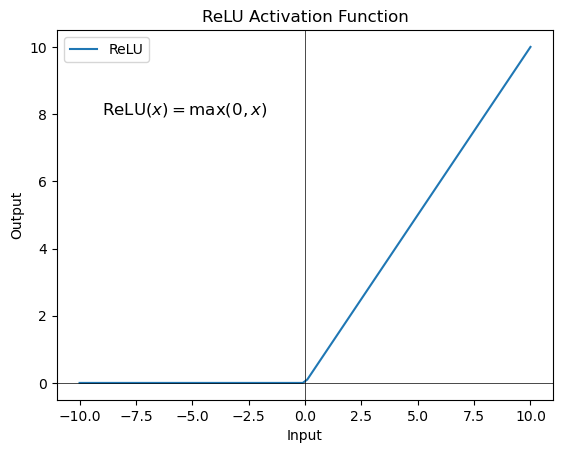

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Generate input values
x = np.linspace(-10, 10, 100)

# Apply the ReLU function to the input values
y = relu(x)

# Plot the ReLU function
plt.plot(x, y, label='ReLU')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('ReLU Activation Function')
plt.legend()

# Display the mathematical formula
formula = r'$\mathrm{ReLU}(x) = \max(0, x)$'
plt.text(-9, 8, formula, fontsize=12)

# Show the plot
plt.show()


In [ ]:
for image_batch, labels_batch in dataset.take(1): #only for one batch
    print(image_batch.shape)
    print(labels_batch.numpy()) #representing single batch images in the form of array
    #each value represent a single image from the dataset

In [ ]:
plt.figure(figsize=(15,15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")
plt.show()

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
